# Fruit Image Classification using VGG16
This notebook is written end executed by **Dr Raheel Siddiqi** on 07-05-2019. The notebook presents an experiment to classify fruit images. [Fruits 360] (https://www.kaggle.com/moltean/fruits) dataset (containing 52262 training images and 17540 test images belonging to 101 fruit classes) has been exploited. The model designed uses VGG16 pre-trained model as the convolutional base.

## Setting up the Model

In [1]:
from tensorflow.python.keras.applications import VGG16

conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(100,100,3))

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [3]:
import os
import numpy as np
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [4]:
from tensorflow.python.keras import models
from tensorflow.python.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(101, activation='softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2359808   
_________________________________________________________________
dense_1 (Dense)              (None, 101)               51813     
Total params: 17,126,309
Trainable params: 17,126,309
Non-trainable params: 0
_________________________________________________________________


## Setting up Training and Validation Data

In [6]:
train_dir='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Training'

In [7]:
validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Test'

In [8]:
from tensorflow.python.keras import optimizers

model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(100, 100),
        batch_size=32)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=32, shuffle=False)

Found 52262 images belonging to 101 classes.
Found 17540 images belonging to 101 classes.


## Model Training

In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1634/1634 [==============================] - 836s 512ms/step - loss: 0.7376 - categorical_accuracy: 0.8004 - val_loss: 0.1555 - val_categorical_accuracy: 0.9505
Epoch 2/50
1634/1634 [==============================] - 481s 294ms/step - loss: 0.1110 - categorical_accuracy: 0.9652 - val_loss: 0.0563 - val_categorical_accuracy: 0.9816
Epoch 3/50
1634/1634 [==============================] - 476s 291ms/step - loss: 0.0771 - categorical_accuracy: 0.9774 - val_loss: 0.0262 - val_categorical_accuracy: 0.9913
Epoch 4/50
1634/1634 [==============================] - 483s 296ms/step - loss: 0.0770 - categorical_accuracy: 0.9776 - val_loss: 0.0756 - val_categorical_accuracy: 0.9771
Epoch 5/50
1634/1634 [==============================] - 475s 291ms/step - loss: 0.0528 - categorical_accuracy: 0.9851 - val_loss: 0.0873 - val_categorical_accuracy: 0.9816
Epoch 6/50
1634/1634 [==============================] - 475s 291ms/step - loss: 0.1222 - cat

Epoch 30/50
1634/1634 [==============================] - 476s 291ms/step - loss: 0.0251 - categorical_accuracy: 0.9945 - val_loss: 0.0078 - val_categorical_accuracy: 0.9987
Epoch 31/50
1634/1634 [==============================] - 475s 291ms/step - loss: 0.0156 - categorical_accuracy: 0.9965 - val_loss: 0.0171 - val_categorical_accuracy: 0.9968
Epoch 32/50
1634/1634 [==============================] - 482s 295ms/step - loss: 0.0206 - categorical_accuracy: 0.9952 - val_loss: 0.0502 - val_categorical_accuracy: 0.9915
Epoch 33/50
1634/1634 [==============================] - 544s 333ms/step - loss: 0.0238 - categorical_accuracy: 0.9945 - val_loss: 0.0190 - val_categorical_accuracy: 0.9964
Epoch 34/50
1634/1634 [==============================] - 545s 334ms/step - loss: 0.0090 - categorical_accuracy: 0.9981 - val_loss: 0.0122 - val_categorical_accuracy: 0.9973
Epoch 35/50
1634/1634 [==============================] - 486s 298ms/step - loss: 0.0306 - categorical_accuracy: 0.9937 - val_loss: 0.03

In [12]:
import matplotlib.pyplot as plt

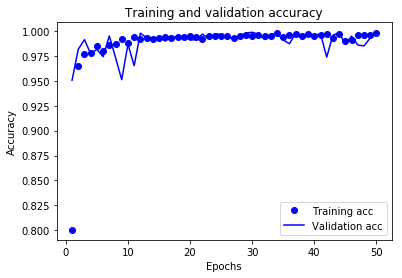

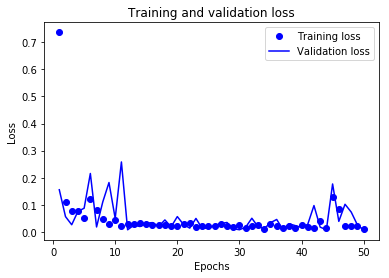

In [13]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('fruit_image_classification_101_classes_transfer learning_vgg16_data augmentation_a',format='png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('fruit_image_classification_101_classes_transfer learning_vgg16_data augmentation_b',format='png')
plt.show()

## Model Evaluation

In [14]:
steps_test=int(17540/32)
print(steps_test)

548


In [15]:
result = model.evaluate_generator(validation_generator, steps=steps_test)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

Test-set classification accuracy: 99.75%
